# Importing Dependencies

In [762]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [763]:
df = pd.read_csv("./data/train.csv")

In [764]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [766]:
# Printing the shape of our datafram
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 891
Number of columns : 12


# Pre-preprocessing the data

In [767]:
# checking the number of null values for each columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

>Dealing with null values

In [768]:
# dropping the Cabin column as 687 values are null out of 891
df = df.drop(columns=['Cabin'], axis=1)

In [769]:
# Checking the frequency of each unique object of the Embarked column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [770]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # filling the null values of Age column
df['Embarked'].fillna('S', inplace=True) # filling the null values of Embarked

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [772]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [773]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

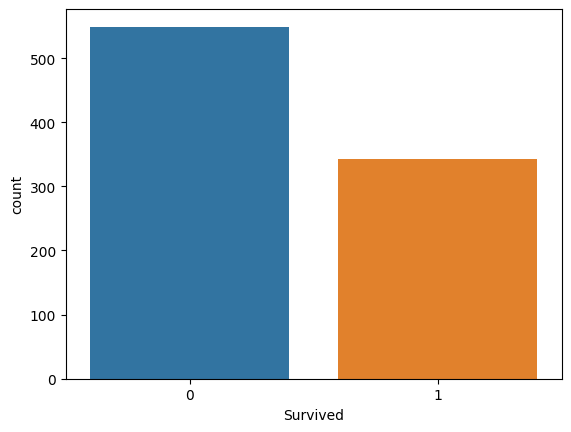

In [774]:
# checking the count of our unique target values in our data frame
sns.countplot(x=df['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

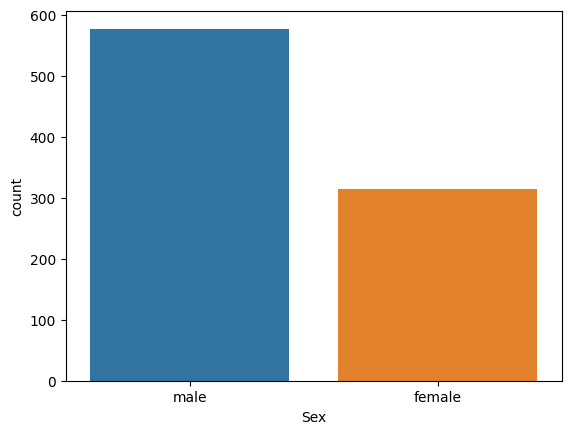

In [775]:
# checking the count of our unique Sex values
sns.countplot(x=df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

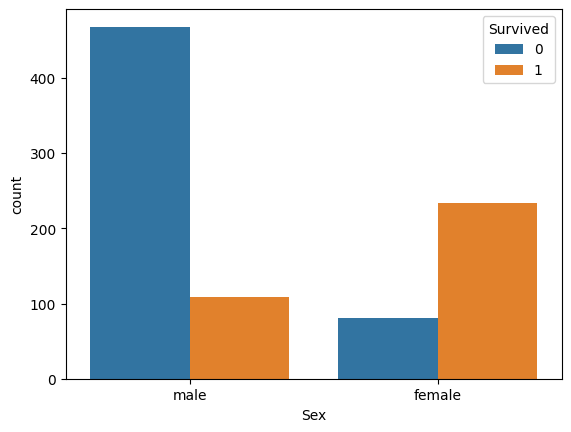

In [776]:
# checking the countplot of number of people survived based on their Sex
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

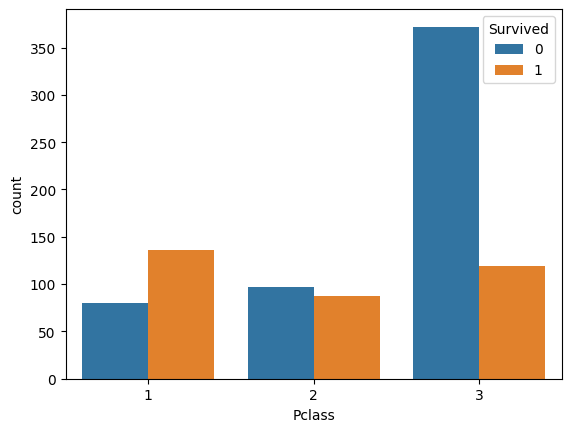

In [777]:
# checking the countplot of number of people survived based on their Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)

<Axes: xlabel='SibSp', ylabel='count'>

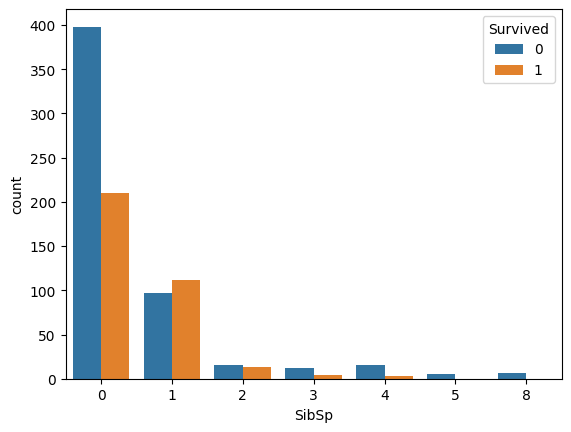

In [778]:
# checking the countplot of number of people survived based on their SibSp
sns.countplot(x='SibSp', hue='Survived', data=df)

>Encoding the categorical columns

In [779]:
df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})


In [780]:
# checking the encoded dataframe
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
727,728,1,3,"Mannion, Miss. Margareth",1,29.699118,0,0,36866,7.7375,2
86,87,0,3,"Ford, Mr. William Neal",0,16.000000,1,3,W./C. 6608,34.3750,0
838,839,1,3,"Chip, Mr. Chang",0,32.000000,0,0,1601,56.4958,0
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,0
77,78,0,3,"Moutal, Mr. Rahamin Haim",0,29.699118,0,0,374746,8.0500,0
467,468,0,1,"Smart, Mr. John Montgomery",0,56.000000,0,0,113792,26.5500,0
450,451,0,2,"West, Mr. Edwy Arthur",0,36.000000,1,2,C.A. 34651,27.7500,0
826,827,0,3,"Lam, Mr. Len",0,29.699118,0,0,1601,56.4958,0
688,689,0,3,"Fischer, Mr. Eberhard Thelander",0,18.000000,0,0,350036,7.7958,0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",1,1.000000,1,1,347742,11.1333,0


Seperating features and target column

In [781]:
X = df.drop(columns=['Survived','PassengerId', 'Name', 'Ticket']) # Selecting the features for our model
Y = df['Survived'] # selecting the target of our model

In [782]:
# checking out the features
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


> scaling the features by the process of standardization

In [783]:
def standard_scaler(X):
    # Calculate the mean of the input array, X, along the columns (axis=0)
    mean = np.mean(X, axis=0)
    # Calculate the standard deviation of the input array, X, along the columns (axis=0)
    scale = np.std(X, axis=0)
    # Scale the input array by subtracting the mean and dividing by the standard deviation
    X_scaled = (X - mean) / scale
    # Return the scaled array
    return X_scaled

In [784]:
scaled_X = standard_scaler(X)
scaled_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.568837
...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.386671,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.044381,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.176263,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,-0.044381,1.005181


In [785]:
# checking out the target
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training and testing set

In [786]:
xtrain, xtest, ytrain, ytest = tts(scaled_X, Y, test_size=0.2, random_state=42)

In [787]:
print(f"xtrain shape : {xtrain.shape}")
print(f"ytrain shape : {ytrain.shape}")

xtrain shape : (712, 7)
ytrain shape : (712,)


In [788]:
print(f"xtest shape : {xtest.shape}")
print(f"ytest shape : {ytest.shape}")

xtest shape : (179, 7)
ytest shape : (179,)


# Building the Primary Model [Logistic Regression]

In [789]:
# initializing the model parameters
m, n = xtrain.shape # m : number of rows, n : number of features
initial_weights = np.zeros(n) # initializing an array of size as 0s
initial_bias = 0 # initializing bias as 0

In [790]:
# binary classifier using the sigmoid activation function
def sigmoid_function(x, w, b):
    z = x.dot(w) + b
    return np.where(1/(1 + np.exp(-z))>0.5, 1, 0)

In [791]:
# The given function Log_Loss calculates the logistic loss for a binary classification problem
def Log_Loss(x,y,w,b):
    ypred = sigmoid_function(x,w,b)
    epsilon = 1e-15
    loss = -np.mean(y * np.log(ypred + epsilon) + (1 - y) * np.log(1 - ypred + epsilon))
    return loss

In [792]:
# calculating our initial log loss using the initailized model parameter 
initial_loss = Log_Loss(xtrain, ytrain, initial_weights, initial_bias)
print(f"Initial_Log_Loss : {initial_loss}")

Initial_Log_Loss : 13.00055066550009


In [793]:
# creating class LogisticRegression to train/fit our model
class LogisticRegression:
    
    # Initialize the model with learning rate (alpha) and number of iterations
    def __init__(self, alpha = 0.001, iterations = 10000):
        self.alpha = alpha # learning rate
        self.iterations = iterations # number of iterations
        
    # Fit the model to training data
    def fit(self, X,Y):
        self.X = X # feature matrix
        self.Y = Y # target vector
        self.m, self.n = X.shape # number of samples, number of features
        self.w = np.zeros(self.n) # initial weights
        self.b = 0 # initial bias
        # update the weights and bias for the specified number of iterations
        for i in range(self.iterations):
            self.update_parameters()
        return self.w, self.b
              
    # Update the parameters (weights and bias) based on the gradient
    def update_parameters(self):
        # Calculate predicted target values
        Y_pred = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
        # Update the weights using gradient descent
        dw = np.dot(self.X.T, (Y_pred - self.Y))/self.m
        self.w = self.w - self.alpha * dw
        # Update the bias using gradient descent
        db = np.sum(Y_pred - self.Y)/self.m
        self.b = self.b - self.alpha * db

    # Predict the target values for a given set of features
    def predict(self, X):
        # Calculate predicted target values
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        # Convert predicted target values to binary classification
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred

In [794]:
# Training the model and printing the updated log loss of our trained model
model = LogisticRegression()
updated_weights, updated_bias = model.fit(xtrain, ytrain)
print(f"Updated Log_loss : {Log_Loss(xtrain, ytrain, updated_weights, updated_bias)}")

Updated Log_loss : 6.888351472018704


# Model Evaluation

> Accuracy

In [795]:
# making predictions on both tarining and testing data 
xtrain_prediction = model.predict(xtrain)
xtest_prediction = model.predict(xtest)

In [796]:
# calculating the accuracy for both the training and testing set
training_data_acc = accuracy_score(xtrain_prediction, ytrain)
testing_data_acc = accuracy_score(xtest_prediction, ytest)
print(f"Training data accuracy : {training_data_acc}")
print(f"Testing data accuracy : {testing_data_acc}")

Training data accuracy : 0.800561797752809
Testing data accuracy : 0.7988826815642458


> Confusion Matrix

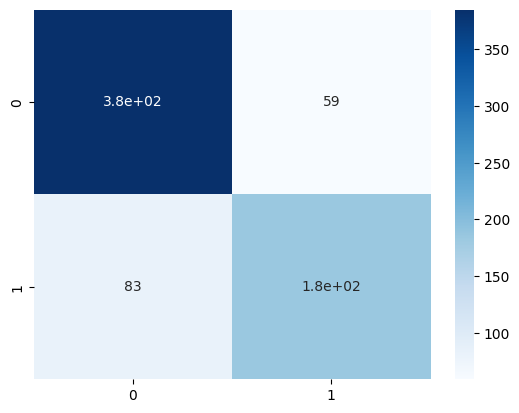

In [797]:
cm_train = confusion_matrix(ytrain, xtrain_prediction)
sns.heatmap(cm_train, annot=True, cmap='Blues')
plt.show()

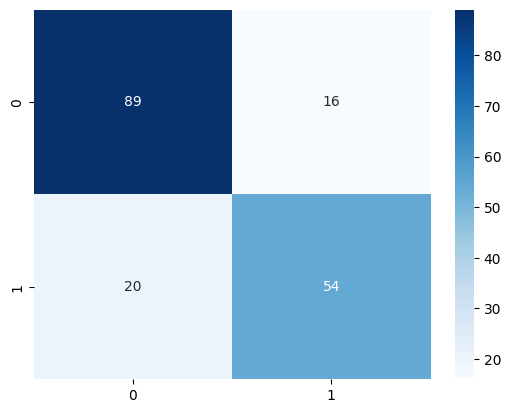

In [798]:
cm_test = confusion_matrix(ytest, xtest_prediction)
sns.heatmap(cm_test, annot=True, cmap='Blues')
plt.show()